### Name: **Muhammad Dawood Rizwan**
###Dataset: **MNIST Digit Recognizer from Kaggel**

### **ANN from scratch on MNIST Dataset**


In [178]:
# Import libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [151]:
#Load Dataset
data = pd.read_csv("/content/train.csv")

In [152]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
data.shape

(42000, 785)

In [154]:
data = np.array(data)  #Converting DataFrame to NumPy Array
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#Split data into validation and training dataset

# validation
data_vali = data[0:1000].T   #first 1000 samples or rows then T
Y_vali = data_vali[0]        # first row after T (labels)
X_vali = data_vali[1:n]      # all rows except first one after T (features/values)
X_vali = X_vali / 255.       # normalize the features btw 0 to 255


# training
data_train = data[1000:m].T  # remaining samples after first 1000 sample
Y_train = data_train[0]       # (labels) first row
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [155]:
#target labels
Y_train


array([2, 5, 1, ..., 9, 9, 5])

In [156]:
#Initialization of Parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [157]:
#Activation Functions
def ReLU(Z):
    return np.maximum(Z, 0)  # x>=0 =x,   x<0 = 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))  # probablities in range 0 to 1
    return A

In [158]:
#Forward Propagation
# Z1 is the input to the ReLU activation function for the first layer.
# A1 is the output of the ReLU activation (i.e., the activations for the first layer).
# Z2 is the input to the softmax activation function for the second layer.
# A2 is the final output of the network, representing the predicted class probabilities.

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [159]:
# ReLU Derivative
# derivative of ReLU is 1 for positive values in Z and 0 otherwise.
# This is used during backpropagation to calculate gradients
def ReLU_deriv(Z):
    return Z > 0

In [160]:
#One-Hot Encoding

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Create a Zero Matrix number of samples/labes  and classes
    one_hot_Y[np.arange(Y.size), Y] = 1          # assign 1 to correct possition
    one_hot_Y = one_hot_Y.T                      #Transpose the Matrix  class to X axis or labels/samples to yaxis after T
    return one_hot_Y

In [161]:
# #Backward Propagation
# dZ2 is the error for the output layer.
# dW2 and db2 are the gradients of the loss function with respect to the weights and biases of the output layer.
# dZ1 is the error term for the hidden layer, computed by backpropagating the error from the output layer.
# dW1 and db1 are the gradients of the loss function with respect to the weights and biases of the hidden layer.
# X is input
# Y is actual output labels

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [162]:
# Updating Parameters

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



In [163]:
# Prediction Function
def get_predictions(A2):
    return np.argmax(A2, 0)  #returns the index of the highest value in each column (since the second argument is 0), which corresponds to the predicted class.

In [164]:
# Accuracy Function
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [165]:
# Cross-Entropy Loss
def compute_loss(A2, Y):
    m = Y.size  # Number of training examples
    one_hot_Y = one_hot(Y)  # Convert Y to one-hot encoded labels
    loss = -np.sum(one_hot_Y * np.log(A2)) / m  # Cross-entropy loss
    return loss

In [166]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()  # Initialize parameters
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)  # Forward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)  # Backpropagation
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)  # Update parameters

        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)  # Get predictions
            accuracy = get_accuracy(predictions, Y)  # Compute accuracy
            loss = compute_loss(A2, Y)  # Compute loss
            print(f"Accuracy: {accuracy * 100:.2f}% | Loss: {loss:.4f}")

    return W1, b1, W2, b2  # Return final parameters

In [168]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 1 8 ... 6 4 7] [2 5 1 ... 9 9 5]
Accuracy: 6.71% | Loss: 3.0942
Iteration:  10
[8 4 8 ... 6 4 7] [2 5 1 ... 9 9 5]
Accuracy: 18.07% | Loss: 2.2580
Iteration:  20
[4 8 8 ... 6 4 7] [2 5 1 ... 9 9 5]
Accuracy: 27.84% | Loss: 2.0221
Iteration:  30
[2 8 8 ... 7 9 0] [2 5 1 ... 9 9 5]
Accuracy: 36.30% | Loss: 1.8452
Iteration:  40
[2 8 8 ... 7 9 0] [2 5 1 ... 9 9 5]
Accuracy: 43.42% | Loss: 1.6721
Iteration:  50
[2 8 8 ... 7 9 0] [2 5 1 ... 9 9 5]
Accuracy: 49.45% | Loss: 1.5046
Iteration:  60
[2 8 8 ... 7 9 3] [2 5 1 ... 9 9 5]
Accuracy: 54.39% | Loss: 1.3596
Iteration:  70
[2 8 8 ... 4 9 3] [2 5 1 ... 9 9 5]
Accuracy: 58.19% | Loss: 1.2432
Iteration:  80
[2 8 8 ... 4 9 3] [2 5 1 ... 9 9 5]
Accuracy: 61.12% | Loss: 1.1517
Iteration:  90
[2 5 8 ... 4 9 3] [2 5 1 ... 9 9 5]
Accuracy: 63.59% | Loss: 1.0791
Iteration:  100
[2 5 8 ... 4 9 3] [2 5 1 ... 9 9 5]
Accuracy: 65.54% | Loss: 1.0200
Iteration:  110
[2 5 8 ... 4 9 3] [2 5 1 ... 9 9 5]
Accuracy: 67.34% | Loss: 0.9708
Iter

In [171]:
# make_predictions
#function uses the trained model parameters to make predictions for a given input.
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [172]:
# test_prediction
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None] #extracts the index-th image & column from x train then reshape to 2D array.
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)  # predict using Neural Network
    label = Y_train[index] #Compare Prediction to True Label
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


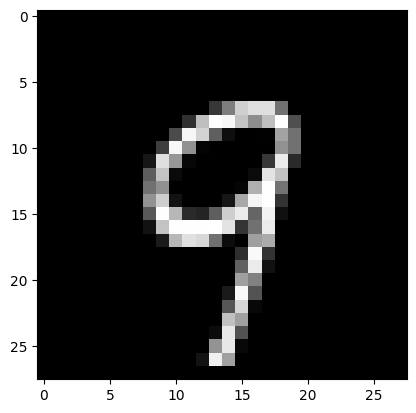

Prediction:  [5]
Label:  5


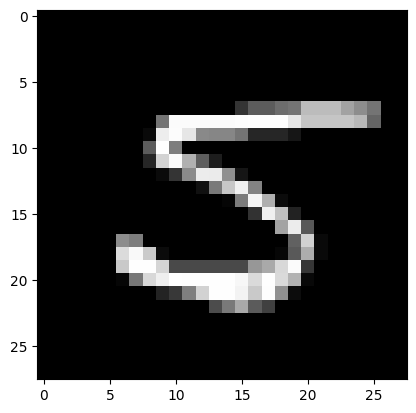

Prediction:  [1]
Label:  1


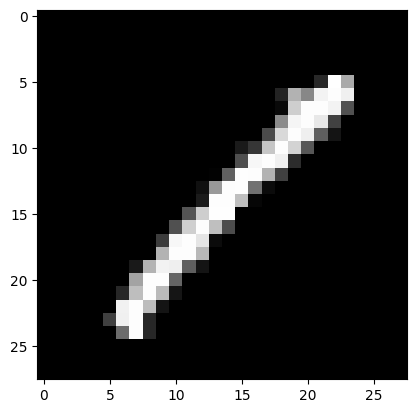

Prediction:  [4]
Label:  9


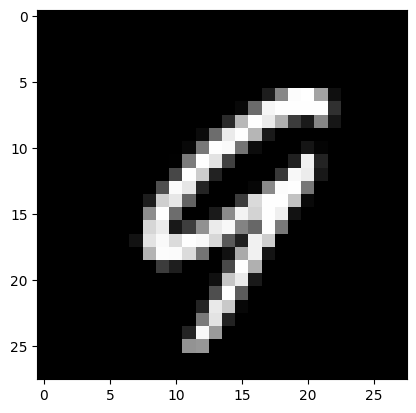

Prediction:  [8]
Label:  8


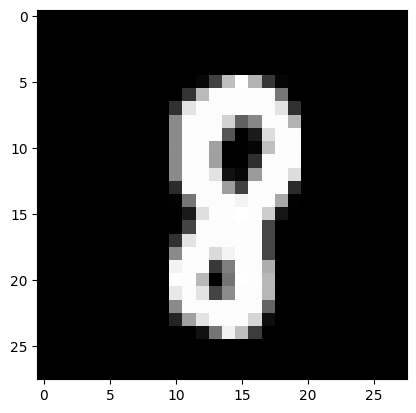

Prediction:  [3]
Label:  9


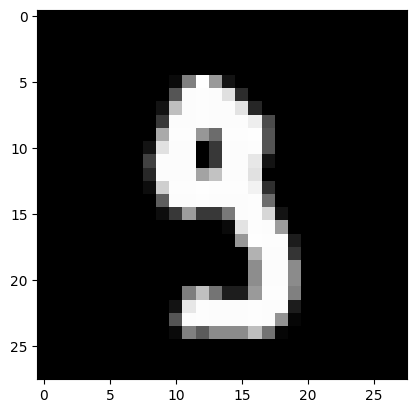

Prediction:  [5]
Label:  5


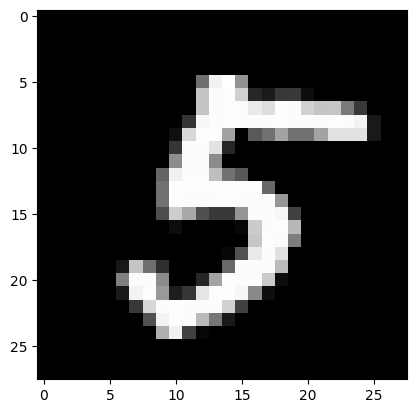

In [175]:
# Test prediction on individual img
test_prediction(10, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(23, W1, b1, W2, b2)
test_prediction(33, W1, b1, W2, b2)

In [177]:
# test on validation dataset

dev_predictions = make_predictions(X_vali, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_vali)

[6 8 2 4 1 0 8 2 1 1 5 4 3 6 6 1 0 9 9 0 4 1 7 0 9 4 2 6 8 3 0 3 9 1 0 5 9
 2 1 2 0 5 4 3 2 7 5 3 0 8 7 7 0 7 5 7 5 1 1 8 3 9 9 5 1 3 3 5 7 3 9 6 7 6
 9 7 2 0 8 7 9 1 3 8 5 5 6 9 6 4 6 7 5 3 2 9 1 1 2 9 9 4 7 2 1 0 2 9 2 6 1
 1 7 0 1 7 1 0 0 5 9 4 9 1 3 3 4 2 2 2 0 9 2 1 9 6 9 1 1 4 2 4 4 3 5 3 9 3
 4 0 3 9 7 4 8 1 7 9 9 0 5 9 9 4 4 3 6 5 1 8 5 6 4 1 8 3 6 3 5 0 8 2 9 6 6
 3 0 9 9 5 4 6 9 7 2 1 6 3 8 2 5 8 4 1 2 4 1 7 8 3 8 8 7 1 3 1 6 8 4 0 4 3
 6 0 0 1 6 2 7 6 4 4 3 6 7 8 6 2 8 3 7 2 9 0 2 8 8 8 6 0 1 1 7 7 5 2 5 2 2
 6 9 6 2 6 5 0 5 6 5 1 2 3 7 6 8 5 9 6 7 2 7 3 9 7 1 5 1 4 2 0 8 8 1 0 5 4
 2 3 2 4 7 9 1 0 5 7 2 8 3 5 2 4 4 7 3 9 1 2 8 2 1 7 7 4 3 1 7 7 5 6 3 6 1
 9 0 7 7 6 7 0 5 2 4 8 0 7 6 3 9 8 3 2 3 4 9 9 2 0 3 4 8 6 2 6 1 4 9 8 7 7
 1 7 7 8 7 0 0 1 2 2 1 2 2 1 7 9 8 5 6 4 7 3 1 7 5 5 3 1 1 9 4 1 4 1 7 0 2
 3 7 1 6 4 9 3 3 4 9 9 1 8 9 6 9 1 9 6 8 8 1 9 5 2 6 9 2 3 1 3 0 1 0 6 3 4
 5 8 0 2 4 1 7 6 6 2 4 1 5 5 0 8 8 6 9 5 7 5 4 0 7 0 1 4 7 9 3 0 1 0 6 0 0
 4 0 9 2 9 7 5 2 0 3 5 9 

0.831